In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
train=pd.read_csv('D:\\ANALYTICS\\INTERNSHALA\\train_csv.csv',index_col=1,parse_dates=True,squeeze=True)
test=pd.read_csv('D:\\ANALYTICS\\INTERNSHALA\\test_csv.csv')#,parse_dates=True,squeeze=True)

In [11]:
train.head()

,id,feature
time,,
2019-03-19 00:00:00,0,237.97
2019-03-19 00:00:10,1,57.93
2019-03-19 00:00:20,2,90.53
2019-03-19 00:00:30,3,260.75
2019-03-19 00:00:40,4,49.70


In [12]:
test.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [17]:
test['time']=test['time'].astype('datetime64[ns]')

In [13]:
train.drop('id',inplace=True,axis=1)

In [14]:
test.drop('id',inplace=True,axis=1)

In [19]:
train.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


Extracting feature,trend,season and residual

In [87]:
el_train=train[0:64]
el_test=train[64:]

In [31]:
import statsmodels.api as sm

In [89]:
extr=sm.tsa.seasonal_decompose(el_train.feature,period=4)


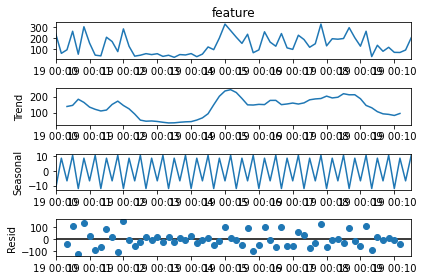

In [90]:
extr.plot()
plt.show()

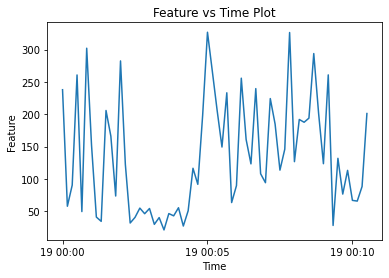

In [91]:
plt.xlabel('Time')
plt.ylabel('Feature')
plt.title('Feature vs Time Plot')
plt.plot(el_train)

Here we could see some non-stationarity present in the data ,since the model building assumes stationarity in the time series  
data we could perform operations on the data to make it stationary.To prove that our hypothesis of the data being  
non stationary we will perform Dicky-Fuller test

In [21]:
from statsmodels.tsa.stattools import adfuller

In [92]:
hypo_adfuller=adfuller(el_train)
hypo_adfuller
print('Test Statistic :',hypo_adfuller[0])
print('p-Value :',hypo_adfuller[1])
print('Rolling Statistic :',hypo_adfuller[2])
print('No:of Observation :',hypo_adfuller[3])
for key,value in hypo_adfuller[4].items():
    print('Critical (%s):  (%s)'%(key,value))

Test Statistic : -2.455519115784161
p-Value : 0.1266753961556623
Rolling Statistic : 2
No:of Observation : 61
Critical (1%):  (-3.542412746661615)
Critical (5%):  (-2.910236235808284)
Critical (10%):  (-2.5927445767266866)


Null Hypothesis:Data is non stationary  
Alternate Hypothesis:Data is stationary  
p-value > (All level of significance namely 1%,5%,10%,fail to reject null hypothesis

</br>

Using diff

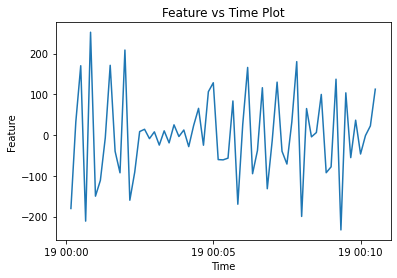

In [93]:
plt.xlabel('Time')
plt.ylabel('Feature')
plt.title('Feature vs Time Plot')
plt.plot(el_train.diff(periods=1))

In [94]:
hypo_adfuller=adfuller(el_train.diff(periods=1).dropna())
print('Test Statistic :',hypo_adfuller[0])
print('p-Value :',hypo_adfuller[1])
print('Rolling Statistic :',hypo_adfuller[2])
print('No:of Observation :',hypo_adfuller[3])
for key,value in hypo_adfuller[4].items():
    print('Critical (%s):  (%s)'%(key,value))

Test Statistic : -10.73195481789552
p-Value : 2.964236109363308e-19
Rolling Statistic : 1
No:of Observation : 61
Critical (1%):  (-3.542412746661615)
Critical (5%):  (-2.910236235808284)
Critical (10%):  (-2.5927445767266866)


Null Hypothesis:Data is non stationary    
Alternate Hypothesis:Data is stationary  
p-value<0.05 there we reject the null hypothesis on all levels of significance since p-value has a very small value.  

</br>

In [95]:
el_train_diff=el_train.diff(periods=1).dropna()
el_test_diff=el_test.diff(periods=1).dropna()

Implementing ARIMA model on the train 

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [189]:
am_model=ARIMA(el_train_diff,order=(1,2,0))#p=1,q=2,d=0 

D:\ANALYTICS\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
D:\ANALYTICS\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


In [190]:
am_model_fit=am_model.fit()

In [191]:
frcast,std_err,conf_intrvl=am_model_fit.forecast(16,alpha=0.05)

In [192]:
frcast_series=pd.Series(frcast,index=el_test.index)

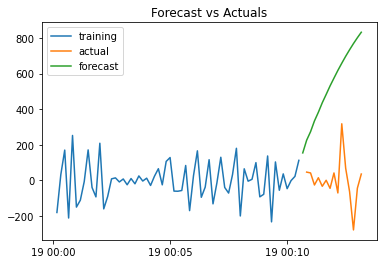

In [193]:
plt.plot(el_train_diff, label='training')
plt.plot(el_test_diff, label='actual')
plt.plot(frcast_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()

In [194]:
std_err

array([ 233.86735572,  387.469803  ,  626.12126472,  868.23636241,
       1154.46972066, 1455.58892069, 1786.0993396 , 2134.14305853,
       2504.99035351, 2893.39998462, 3301.15071541, 3725.71323531,
       4167.52207115, 4625.22266562, 5098.7426842 , 5587.26562491])

In [152]:
from sklearn.metrics import mean_squared_error
import math

In [195]:
mse=mean_squared_error(el_test['feature'],frcast_series)

In [196]:
rmse=math.sqrt(mse)

In [197]:
rmse

398.96913856251166

</br>

In [135]:
from statsmodels.tsa.arima_model import ARIMA

In [198]:
am_model=ARIMA(el_train_diff,order=(2,1,0))
am_model_fit=am_model.fit()
frcast,std_err,conf_intrvl=am_model_fit.forecast(16,alpha=0.05)
frcast_series=pd.Series(frcast,index=el_test.index)

D:\ANALYTICS\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
D:\ANALYTICS\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


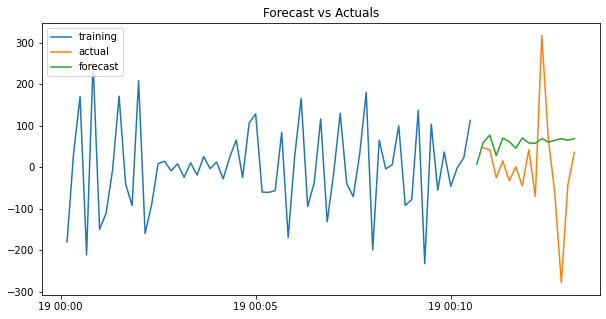

In [199]:
rcast,std_err,conf_intrvl=am_model_fit.forecast(16,alpha=0.05)
frcast_series=pd.Series(frcast,index=el_test.index)
plt.figure(figsize=(10,5))
plt.plot(el_train_diff, label='training')
plt.plot(el_test_diff, label='actual')
plt.plot(frcast_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()

In [200]:
std_err

array([108.82373467, 108.8662208 , 116.34307146, 135.07389397,
       135.56609596, 145.28336323, 152.88298437, 155.0527804 ,
       163.29775453, 167.96374056, 171.57656838, 177.9507222 ,
       181.85491005, 186.10330399, 191.17828034, 194.93366936])

In [152]:
from sklearn.metrics import mean_squared_error
import math

In [201]:
mse=mean_squared_error(el_test['feature'],frcast_series)

In [202]:
rmse=math.sqrt(mse)

In [203]:
rmse

177.5684502958636

</br>

In [205]:
am_model=ARIMA(el_train_diff,order=(2,1,1))
am_model_fit=am_model.fit()
frcast,std_err,conf_intrvl=am_model_fit.forecast(16,alpha=0.05)
frcast_series=pd.Series(frcast,index=el_test.index)

D:\ANALYTICS\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
D:\ANALYTICS\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


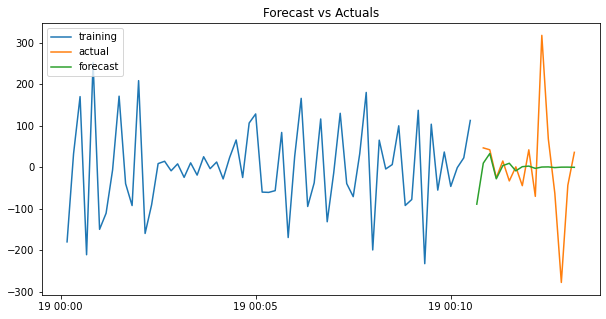

In [206]:
rcast,std_err,conf_intrvl=am_model_fit.forecast(16,alpha=0.05)
frcast_series=pd.Series(frcast,index=el_test.index)
plt.figure(figsize=(10,5))
plt.plot(el_train_diff, label='training')
plt.plot(el_test_diff, label='actual')
plt.plot(frcast_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()

In [207]:
std_err

array([ 83.58971879, 101.66415395, 101.68641532, 104.66598694,
       106.22404012, 106.23200609, 106.48474504, 106.63511624,
       106.63678745, 106.65869668, 106.67324803, 106.67352783,
       106.67542504, 106.67682062, 106.67686266, 106.67702794])

In [152]:
from sklearn.metrics import mean_squared_error
import math

In [208]:
mse=mean_squared_error(el_test['feature'],frcast_series)

In [209]:
rmse=math.sqrt(mse)

In [210]:
rmse

229.28867067219693

</br>

D:\ANALYTICS\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
D:\ANALYTICS\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


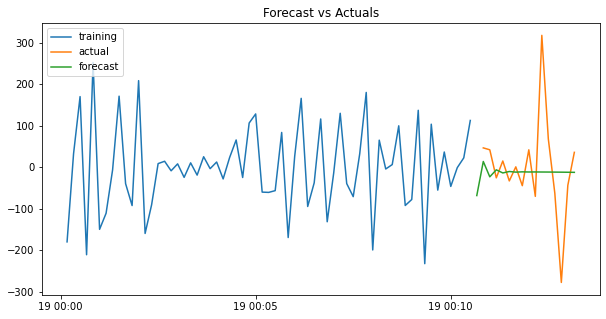

In [211]:
am_model=ARIMA(el_train_diff,order=(1,2,2))
am_model_fit=am_model.fit()
frcast,std_err,conf_intrvl=am_model_fit.forecast(16,alpha=0.05)
frcast_series=pd.Series(frcast,index=el_test.index)
rcast,std_err,conf_intrvl=am_model_fit.forecast(16,alpha=0.05)
frcast_series=pd.Series(frcast,index=el_test.index)
plt.figure(figsize=(10,5))
plt.plot(el_train_diff, label='training')
plt.plot(el_test_diff, label='actual')
plt.plot(frcast_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()

In [212]:
std_err

array([ 95.6173101 , 104.61279119, 106.62450711, 106.87550565,
       107.03885083, 107.04010353, 107.09898893, 107.13485035,
       107.19932395, 107.26961233, 107.35985156, 107.46529802,
       107.59056414, 107.73560265, 107.9026246 , 108.09270858])

In [213]:
from sklearn.metrics import mean_squared_error
import math

In [214]:
mse=mean_squared_error(el_test['feature'],frcast_series)

In [215]:
rmse=math.sqrt(mse)

In [216]:
rmse

238.2071031670599

</br>

In [217]:
am_model=ARIMA(el_train_diff,order=(1,1,0))
am_model_fit=am_model.fit()
frcast,std_err,conf_intrvl=am_model_fit.forecast(16,alpha=0.05)
frcast_series=pd.Series(frcast,index=el_test.index)

D:\ANALYTICS\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)
D:\ANALYTICS\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency 10S will be used.
  % freq, ValueWarning)


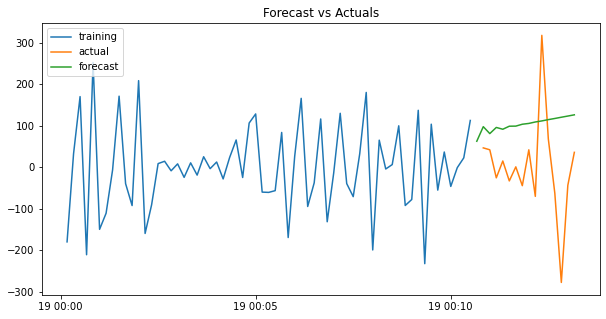

In [218]:
rcast,std_err,conf_intrvl=am_model_fit.forecast(16,alpha=0.05)
frcast_series=pd.Series(frcast,index=el_test.index)
plt.figure(figsize=(10,5))
plt.plot(el_train_diff, label='training')
plt.plot(el_test_diff, label='actual')
plt.plot(frcast_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()

In [219]:
std_err

array([142.28094511, 152.8101791 , 187.34089131, 202.30627562,
       223.85746061, 239.09553402, 255.89682447, 270.22165419,
       284.65086876, 297.9010607 , 310.86681512, 323.1487583 ,
       335.07695619, 346.53823527, 357.66576674, 368.43768796])

In [152]:
from sklearn.metrics import mean_squared_error
import math

In [220]:
mse=mean_squared_error(el_test['feature'],frcast_series)

In [221]:
rmse=math.sqrt(mse)

In [222]:
rmse

145.8212677480982

We find from above different configuration p=1,q=1,d=0 gives best RMSE.

Train set are divided into el_train and el_test ,values are predicted/forecasted using el_train and RMSE values calculated.  
Given  the value of RMSE model has done a very decent job in forecasting.

Now fiiting the model on train and forecasting for next 40 observations(for data points in test.csv)

In [230]:
pred_frcast=am_model_fit.forecast(40)

In [231]:
pred_frcast

(array([ 62.56658987,  97.73969559,  81.02670714,  95.87246589,
         91.52320638,  98.84895804,  99.07360232, 103.61736246,
        105.5341011 , 109.04867647, 111.59139751, 114.72523079,
        117.49953109, 120.49251061, 123.35248258, 126.2933539 ,
        129.18501971, 132.10661385, 135.01000464, 137.92446728,
        140.83219568, 143.74402005, 146.65335312, 149.56420148,
        152.47412819, 155.38461548, 158.29476181, 161.20511552,
        164.11534309, 167.02564738, 169.93590501, 172.84619103,
        175.75645978, 178.66673903, 181.57701189, 184.48728864,
        187.39756302, 190.30783884, 193.21811379, 196.12838927]),
 array([142.28094511, 152.8101791 , 187.34089131, 202.30627562,
        223.85746061, 239.09553402, 255.89682447, 270.22165419,
        284.65086876, 297.9010607 , 310.86681512, 323.1487583 ,
        335.07695619, 346.53823527, 357.66576674, 368.43768796,
        378.91514994, 389.10368729, 399.03625835, 408.72509597,
        418.1909629 , 427.44639851, 43

From above 3 array taking only the first array i.e pred_frcast[0]

In [233]:
pred_frcast[0]

array([ 62.56658987,  97.73969559,  81.02670714,  95.87246589,
        91.52320638,  98.84895804,  99.07360232, 103.61736246,
       105.5341011 , 109.04867647, 111.59139751, 114.72523079,
       117.49953109, 120.49251061, 123.35248258, 126.2933539 ,
       129.18501971, 132.10661385, 135.01000464, 137.92446728,
       140.83219568, 143.74402005, 146.65335312, 149.56420148,
       152.47412819, 155.38461548, 158.29476181, 161.20511552,
       164.11534309, 167.02564738, 169.93590501, 172.84619103,
       175.75645978, 178.66673903, 181.57701189, 184.48728864,
       187.39756302, 190.30783884, 193.21811379, 196.12838927])

In [234]:
test['Forecast']=pred_frcast[0]

In [235]:
test.to_csv('D:\\ANALYTICS\\INTERNSHALA\\RamKishore_FinalForecast.csv')